Sample Data:
   ID                                               Text  Emotion
0   1                   I’m thrilled about my promotion!      Joy
1   2   This is the worst service I’ve ever experienced.    Anger
2   3  I feel so overwhelmed with all the work I have...  Sadness
3   4  I can’t believe how lucky I am to have such su...      Joy
4   5       I’m anxious about the upcoming presentation.  Anxiety

No missing values detected.

Emotion Counts:
Counter({'Joy': 200, 'Anger': 100, 'Sadness': 100, 'Anxiety': 100, 'Frustration': 100, 'Surprise': 100, 'Fear': 100, 'Relief': 100, 'Confusion': 100})


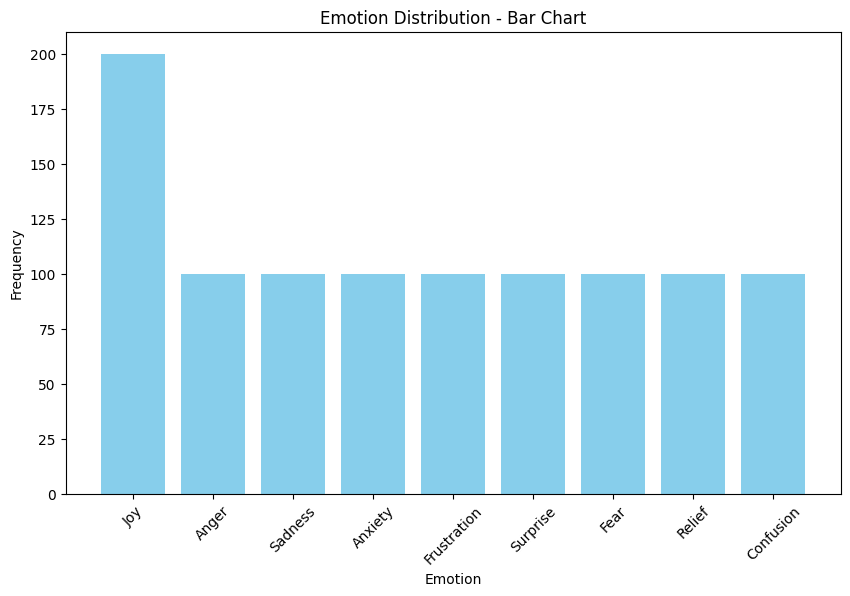

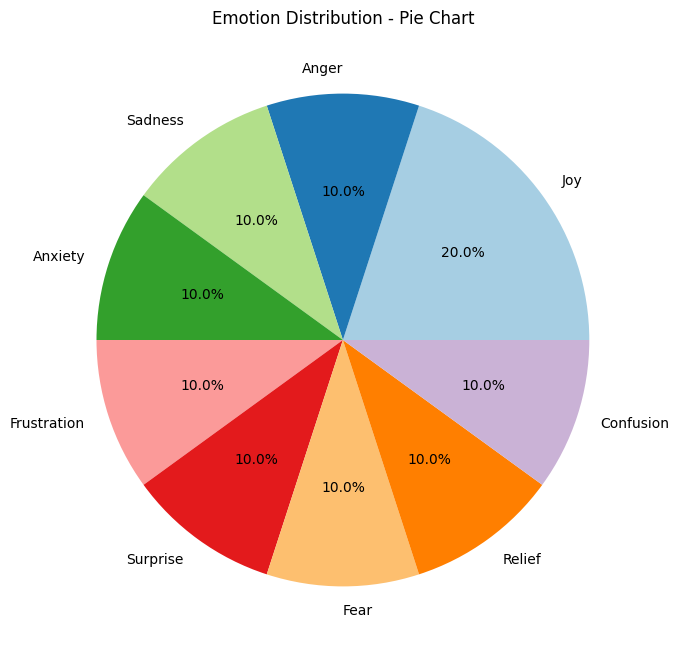


Sample Conversations with Emotion 'Joy':
    ID                                               Text Emotion  \
0    1                   I’m thrilled about my promotion!     Joy   
3    4  I can’t believe how lucky I am to have such su...     Joy   
10  11                   I’m thrilled about my promotion!     Joy   
13  14  I can’t believe how lucky I am to have such su...     Joy   
20  21                   I’m thrilled about my promotion!     Joy   

                                         Cleaned_Text  
0                    i’m thrilled about my promotion!  
3   i can’t believe how lucky i am to have such su...  
10                   i’m thrilled about my promotion!  
13  i can’t believe how lucky i am to have such su...  
20                   i’m thrilled about my promotion!  

Filtered conversations saved to 'filtered_joy_conversations.xlsx'.

Enter an emotion to filter conversations (or type 'exit' to quit): i am son
Invalid emotion. Please try again.

Enter an emotion to filter

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Load the Dataset
file_path = "emotion_based_conversation_filter.xlsx"  # Path to the dataset file
data = pd.read_excel(file_path)

# Step 2: Display the first few rows
print("Sample Data:")
print(data.head())

# Step 3: Check for missing values
if data.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    data.dropna(inplace=True)
else:
    print("\nNo missing values detected.")

# Step 4: Count the distribution of emotions
emotion_counts = Counter(data['Emotion'])
print("\nEmotion Counts:")
print(emotion_counts)

# Step 5: Visualize Emotion Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title("Emotion Distribution - Bar Chart")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Step 6: Visualize Emotion Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Emotion Distribution - Pie Chart")
plt.show()

# Step 7: Text Preprocessing
def preprocess_text(text):
    """
    Cleans and preprocesses the input text by removing extra whitespace and converting to lowercase.
    :param text: Original text string.
    :return: Cleaned text string.
    """
    return " ".join(text.lower().strip().split())

# Apply text preprocessing
data['Cleaned_Text'] = data['Text'].apply(preprocess_text)

# Step 8: Filter Conversations by Emotion
def filter_by_emotion(emotion):
    """
    Filter dataset by a specific emotion.
    :param emotion: The emotion to filter by.
    :return: Filtered DataFrame.
    """
    return data[data['Emotion'] == emotion]

# Example: Filter conversations with emotion 'Joy'
filtered_joy = filter_by_emotion('Joy')
print("\nSample Conversations with Emotion 'Joy':")
print(filtered_joy.head())

# Step 9: Save Filtered Data to Excel
output_path = "filtered_joy_conversations.xlsx"
filtered_joy.to_excel(output_path, index=False, engine='openpyxl')
print(f"\nFiltered conversations saved to '{output_path}'.")

# Step 10: Export All Filtered Data
def export_all_emotions():
    """
    Exports separate files for each emotion's filtered dataset.
    """
    for emotion in emotion_counts.keys():
        emotion_filtered = filter_by_emotion(emotion)
        emotion_output_path = f"filtered_{emotion}_conversations.xlsx"
        emotion_filtered.to_excel(emotion_output_path, index=False, engine='openpyxl')
        print(f"Exported {emotion} data to '{emotion_output_path}'.")

# Uncomment to export all filtered data
# export_all_emotions()

# Step 11: Interactive Filtering
while True:
    user_input = input("\nEnter an emotion to filter conversations (or type 'exit' to quit): ").strip()
    if user_input.lower() == 'exit':
        print("Exiting the program. Goodbye!")
        break
    elif user_input not in emotion_counts:
        print("Invalid emotion. Please try again.")
    else:
        filtered_data = filter_by_emotion(user_input)
        print(f"\nSample Conversations with Emotion '{user_input}':")
        print(filtered_data.head())
        save_option = input(f"Do you want to save '{user_input}' data to an Excel file? (yes/no): ").strip().lower()
        if save_option == 'yes':
            filtered_data.to_excel(f"filtered_{user_input}_conversations.xlsx", index=False, engine='openpyxl')
            print(f"Filtered data for '{user_input}' saved successfully!")